# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [173]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import scipy.stats as st

# Import API key
#from api_keys import weather_api_key

weather_api_key = "aef8c2d484b89700bd4c96e8b2ee75c8"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [174]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [175]:
#Lists with city data 

citname = []
lat = []
maxtemp = []
humidity = []
cloudiness = []
windspeed = []

#Base and query urls for current weather data on openweathermap

base_url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'
query_url = f'{base_url}appid={weather_api_key}&units={units}&q='

for city in cities:
    response = requests.get(query_url + city).json()
    try:
        citname.append(response['name'])
        lat.append(response['coord']['lat'])
        maxtemp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        print(f'{city} found, grabbing data.')
    except KeyError:
        print(f'{city} not found.')
        pass





izazi found, grabbing data.
mujiayingzi found, grabbing data.
qaanaaq found, grabbing data.
kaputa found, grabbing data.
inderborskiy not found.
vaini found, grabbing data.
lar found, grabbing data.
verkhnevilyuysk found, grabbing data.
lasa found, grabbing data.
zamosc found, grabbing data.
kodiak found, grabbing data.
kununurra found, grabbing data.
tsihombe not found.
rikitea found, grabbing data.
balykshi found, grabbing data.
teluknaga found, grabbing data.
save found, grabbing data.
baneh found, grabbing data.
bukama found, grabbing data.
provideniya found, grabbing data.
sawtell found, grabbing data.
mys shmidta not found.
garissa found, grabbing data.
kashi found, grabbing data.
bambous virieux found, grabbing data.
kavieng found, grabbing data.
sentyabrskiy not found.
ushuaia found, grabbing data.
airai found, grabbing data.
samusu not found.
tessalit found, grabbing data.
hobart found, grabbing data.
new norfolk found, grabbing data.
mar del plata found, grabbing data.
saint-

campbell found, grabbing data.
meulaboh found, grabbing data.
massakory found, grabbing data.
polikarpion not found.
kolondieba found, grabbing data.
jalu found, grabbing data.
bajo baudo not found.
anloga found, grabbing data.
cherskiy found, grabbing data.
ugoofaaru found, grabbing data.
grindavik found, grabbing data.
yozgat found, grabbing data.
taoudenni found, grabbing data.
savannakhet found, grabbing data.
cidreira found, grabbing data.
manokwari found, grabbing data.
chokurdakh found, grabbing data.
port augusta found, grabbing data.
mahadday weyne not found.
kieta found, grabbing data.
sambava found, grabbing data.
benguela found, grabbing data.
nova venecia found, grabbing data.
thompson found, grabbing data.
ajaccio found, grabbing data.
lindi found, grabbing data.
palana found, grabbing data.
dongying found, grabbing data.
liberal found, grabbing data.
luau found, grabbing data.
portland found, grabbing data.
hofn found, grabbing data.
oksfjord found, grabbing data.
katsiv

nizwa found, grabbing data.
kaspiyskiy found, grabbing data.
mahajanga found, grabbing data.
cam ranh found, grabbing data.
winchester found, grabbing data.
cukai found, grabbing data.
tucuman found, grabbing data.
great yarmouth found, grabbing data.
saint-junien found, grabbing data.
salalah found, grabbing data.
mutsamudu not found.
virginia beach found, grabbing data.
malanville found, grabbing data.
hovd found, grabbing data.
colchester found, grabbing data.
prata found, grabbing data.
impfondo found, grabbing data.
bonthe found, grabbing data.
mrirt not found.
baboua not found.
vilhena found, grabbing data.
walvis bay found, grabbing data.
abonnema found, grabbing data.
komsomolskiy found, grabbing data.
tomatlan found, grabbing data.
lekoni found, grabbing data.
valparaiso found, grabbing data.
lamu found, grabbing data.
maxixe found, grabbing data.
ilebo found, grabbing data.
alta floresta found, grabbing data.
hilter found, grabbing data.
manggar found, grabbing data.
boa vist

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [203]:
CityData = pd.DataFrame({'City': citname, 'Lat': lat, 'Max Temp': maxtemp, '% Humidity': humidity, 
                         'Cloudiness': cloudiness, 'Wind Speed': windspeed})
CityData.index.name = 'City_ID'

In [204]:
CityData

,City,Lat,Max Temp,% Humidity,Cloudiness,Wind Speed
City_ID,,,,,,
0,Izazi,-7.2000,69.80,83,75,2.66
1,Mujiayingzi,42.1167,30.16,29,0,1.30
2,Qaanaaq,77.4840,4.26,65,100,3.78
3,Kaputa,-8.4689,70.59,78,99,4.09
4,Vaini,-21.2000,68.00,100,75,4.61
...,...,...,...,...,...,...
565,Takāb,36.4009,42.91,75,0,4.07
566,Ialibu,-6.2821,55.09,97,100,2.35
567,Luxor,25.6989,78.80,31,0,5.75


In [205]:
CityData.to_csv(r'../output_data/CityData.csv',header=True)

In [178]:
HumidCities_df = CityData.sort_values('% Humidity', ascending=False)
HumidCities_df.head(10)

#No cities with humidity >100%

,City,Lat,Max Temp,% Humidity,Cloudiness,Wind Speed
414,Hambantota,6.1241,77.00,100,0,5.75
239,Moindou,-21.6924,68.00,100,0,4.61
257,Grindavik,63.8424,44.60,100,90,13.80
4,Vaini,-21.2000,68.00,100,75,4.61
172,Port Macquarie,-31.4333,66.20,100,75,4.61
213,Alofi,-19.0595,71.60,100,100,10.80
295,Mount Gambier,-37.8333,50.00,100,75,3.44
325,Marabu,4.4148,77.00,100,40,2.30
541,Coahuayana Viejo,18.7333,78.80,100,1,7.67
439,Kundiawa,-6.0167,61.36,99,100,2.48


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [179]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# Calculate quartiles, upper and lower bounds for % humidity

humiditySer = pd.Series(humidity)

Humidityquartiles = humiditySer.quantile([.25,.5,.75])
Humiditylowerq = Humidityquartiles[0.25]
Humidityupperq = Humidityquartiles[.75]
Humidityiqr = Humidityupperq-Humiditylowerq
    

HumidityLowerBound = Humiditylowerq - (1.5*Humidityiqr)
HumidityUpperBound = Humidityupperq + (1.5*Humidityiqr)   

# Determine outliers using upper and lower bounds

Humidityoutliers = [x for x in humiditySer if x > HumidityUpperBound or x < HumidityLowerBound]
print(list(Humidityoutliers))

[11, 5, 12, 17, 12, 13, 9, 16, 15, 13, 11, 19, 11, 12, 18, 19, 18, 15, 19, 10, 16, 19]


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

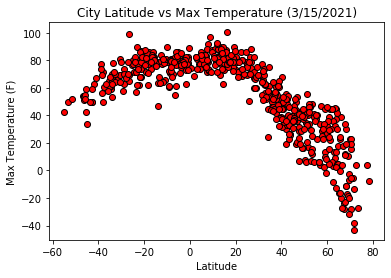

In [217]:
plt.scatter(lat,maxtemp, facecolors='red', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs Max Temperature (3/15/2021)')
plt.savefig('../output_data/Fig1.png')
plt.show()


In [ ]:
#As expected, city temperatures drop as they are farther removed from the equator. This analysis was done
#during winter in the northern hemisphere (March), explaining in part the sharper decline in temperatures
#at more northern (positive latitudes) cities.

## Latitude vs. Humidity Plot

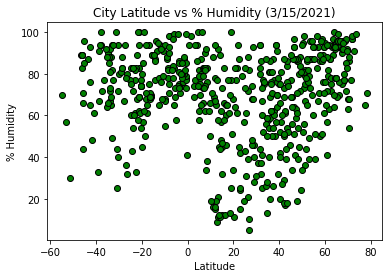

In [218]:
plt.scatter(lat,humidity, facecolors='green', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('% Humidity')
plt.title('City Latitude vs % Humidity (3/15/2021)')
plt.savefig('../output_data/Fig2.png')
plt.show()

In [ ]:
#Air humidity versus latitude. Weak correlation, except at latitudes 20-40 deg from the equator where air humidity
#appears lower. Possibly these cities are located around deserts in these areas.

## Latitude vs. Cloudiness Plot

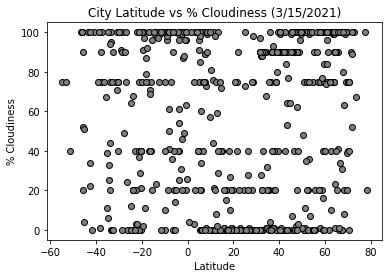

In [219]:
plt.scatter(lat,cloudiness, facecolors='gray', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('% Cloudiness')
plt.title('City Latitude vs % Cloudiness (3/15/2021)')
plt.savefig('../output_data/Fig3.png')
plt.show()

In [ ]:
#Cloudiness in pct of the sky versus latitude. Lots of cities with no clouds at all (0%), or completely overcast
#(100%). Between these two, many cities with around 20, 40 or 75% clouds, exposing some bias in how this is quantified.

## Latitude vs. Wind Speed Plot

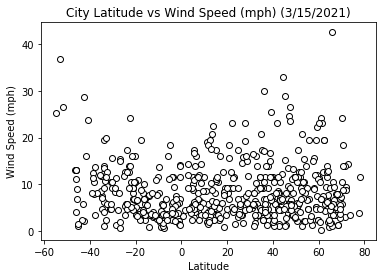

In [220]:
plt.scatter(lat,windspeed, facecolors='white', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs Wind Speed (mph) (3/15/2021)')
plt.savefig('../output_data/Fig4.png')
plt.show()

In [ ]:
#Wind speed vs latitude. Little correlation between the two. The outliers are at higher degrees latitude.

## Linear Regression

In [184]:
Northernhem = CityData['Lat'] > 0
NorCityData = CityData[Northernhem] 
NorCityData.head()

,City,Lat,Max Temp,% Humidity,Cloudiness,Wind Speed
1,Mujiayingzi,42.1167,30.16,29,0,1.30
2,Qaanaaq,77.4840,4.26,65,100,3.78
5,Lar,26.2039,70.79,21,0,6.51
6,Verkhnevilyuysk,63.4453,9.01,94,99,6.80
7,Laas,46.6166,50.00,64,40,6.91


In [185]:
Southernhem = CityData['Lat'] < 0
SouCityData = CityData[Southernhem] 
SouCityData.head()

,City,Lat,Max Temp,% Humidity,Cloudiness,Wind Speed
0,Izazi,-7.2000,69.80,83,75,2.66
3,Kaputa,-8.4689,70.59,78,99,4.09
4,Vaini,-21.2000,68.00,100,75,4.61
10,Kununurra,-15.7667,78.80,89,96,5.75
11,Rikitea,-23.1203,80.13,77,40,13.82


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

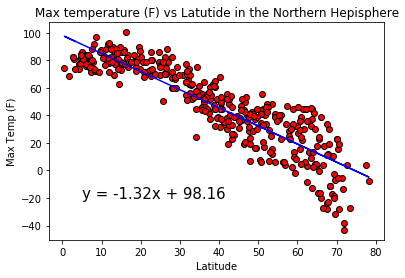

The r-value is -0.89


In [221]:
NorLat = NorCityData['Lat']
NorTemp = NorCityData['Max Temp']


nortempcorrelation = st.pearsonr(NorLat, NorTemp)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(NorLat, NorTemp)
regress_values = NorLat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(NorLat,NorTemp, facecolors='red', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title('Max temperature (F) vs Latutide in the Northern Hepisphere')
plt.plot(NorLat,regress_values,"b-")
plt.annotate(line_eq,(5,-20),fontsize=15,color="black")
plt.savefig('../output_data/Fig5.png')
plt.show()
print(f"The r-value is {round(nortempcorrelation[0],2)}")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

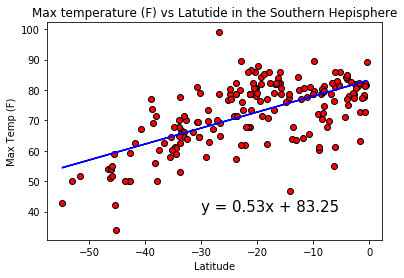

The r-value is 0.64


In [222]:
SouLat = SouCityData['Lat']
SouTemp = SouCityData['Max Temp']


soutempcorrelation = st.pearsonr(SouLat, SouTemp)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(SouLat, SouTemp)
regress_values = SouLat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(SouLat,SouTemp, facecolors='red', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title('Max temperature (F) vs Latutide in the Southern Hepisphere')
plt.plot(SouLat,regress_values,"b-")
plt.annotate(line_eq,(-30,40),fontsize=15,color="black")
plt.savefig('../output_data/Fig6.png')
plt.show()
print(f"The r-value is {round(soutempcorrelation[0],2)}")

In [ ]:
#Negative correlation between latitude and temperature in both northern and southern hemispheres. R-value is positive
#in southern hemisphere because we assigned negative values to latitudes there. Stronger correlation in the northern
#hemisphere because we collected data in March (winter in the northern hemisphere).

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

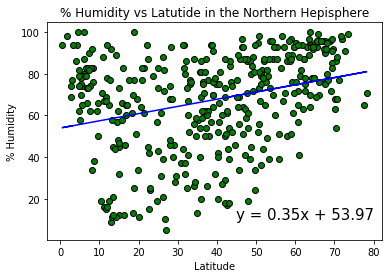

The r-value is 0.3


In [223]:
NorHum = NorCityData['% Humidity']


norhumcorrelation = st.pearsonr(NorLat, NorHum)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(NorLat, NorHum)
regress_values = NorLat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(NorLat,NorHum, facecolors='green', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('% Humidity')
plt.title('% Humidity vs Latutide in the Northern Hepisphere')
plt.plot(NorLat,regress_values,"b-")
plt.annotate(line_eq,(45,10),fontsize=15,color="black")
plt.savefig('../output_data/Fig7.png')
plt.show()
print(f"The r-value is {round(norhumcorrelation[0],2)}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

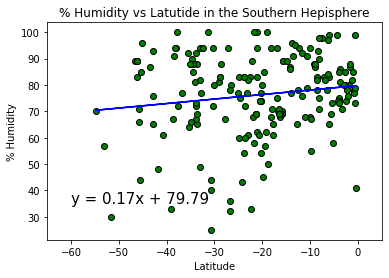

The r-value is 0.15


In [224]:
SouHum = SouCityData['% Humidity']


souhumcorrelation = st.pearsonr(SouLat, SouHum)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(SouLat, SouHum)
regress_values = SouLat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(SouLat,SouHum, facecolors='green', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('% Humidity')
plt.title('% Humidity vs Latutide in the Southern Hepisphere')
plt.plot(SouLat,regress_values,"b-")
plt.xlim([-65,5])
plt.annotate(line_eq,(-60,35),fontsize=15,color="black")
plt.savefig('../output_data/Fig8.png')
plt.show()
print(f"The r-value is {round(souhumcorrelation[0],2)}")

In [ ]:
#Weak correlation between humidity and latitude in both hemispheres. A somewhat stronger correlation in the northern
#hemisphere, due to low humidity in cities 10-40 deg north of the equator. These cities are likely located around
#deserts.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

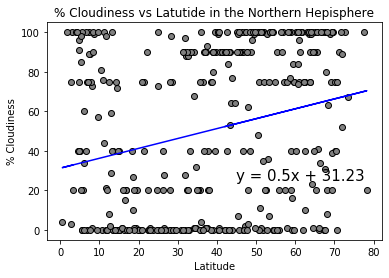

The r-value is 0.25


In [225]:
NorClou = NorCityData['Cloudiness']


norcloucorrelation = st.pearsonr(NorLat, NorClou)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(NorLat, NorClou)
regress_values = NorLat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(NorLat,NorClou, facecolors='gray', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('% Cloudiness')
plt.title('% Cloudiness vs Latutide in the Northern Hepisphere')
plt.plot(NorLat,regress_values,"b-")
plt.annotate(line_eq,(45,25),fontsize=15,color="black")
plt.savefig('../output_data/Fig9.png')
plt.show()
print(f"The r-value is {round(norcloucorrelation[0],2)}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

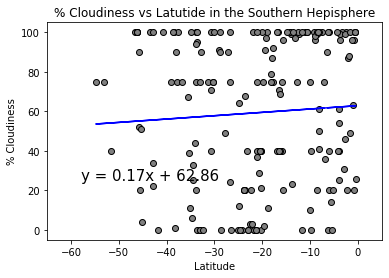

The r-value is 0.06


In [226]:
SouClou = SouCityData['Cloudiness']


soucloucorrelation = st.pearsonr(SouLat, SouClou)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(SouLat, SouClou)
regress_values = SouLat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(SouLat,SouClou, facecolors='gray', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('% Cloudiness')
plt.title('% Cloudiness vs Latutide in the Southern Hepisphere')
plt.plot(SouLat,regress_values,"b-")
plt.xlim([-65,5])
plt.annotate(line_eq,(-58,25),fontsize=15,color="black")
plt.savefig('../output_data/Fig10.png')
plt.show()
print(f"The r-value is {round(soucloucorrelation[0],2)}")

In [ ]:
#Weak correlation between cloudiness and latitude in both hemispheres. More cloudiness around the equator with a 
#strong dip 10-40 deg north of the equator.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

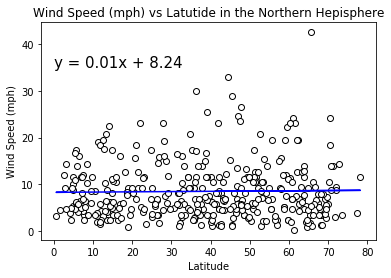

The r-value is 0.02


In [227]:
NorWin = NorCityData['Wind Speed']


norwincorrelation = st.pearsonr(NorLat, NorWin)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(NorLat, NorWin)
regress_values = NorLat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(NorLat,NorWin, facecolors='white', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Wind Speed (mph) vs Latutide in the Northern Hepisphere')
plt.plot(NorLat,regress_values,"b-")
plt.annotate(line_eq,(0,35),fontsize=15,color="black")
plt.savefig('../output_data/Fig11.png')
plt.show()
print(f"The r-value is {round(norwincorrelation[0],2)}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

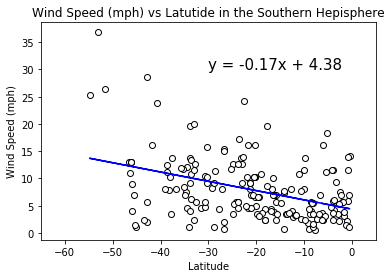

The r-value is -0.4


In [228]:
SouWin = SouCityData['Wind Speed']


souwincorrelation = st.pearsonr(SouLat, SouWin)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(SouLat, SouWin)
regress_values = SouLat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(SouLat,SouWin, facecolors='white', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Wind Speed (mph) vs Latutide in the Southern Hepisphere')
plt.plot(SouLat,regress_values,"b-")
plt.xlim([-65,5])
plt.annotate(line_eq,(-30,30),fontsize=15,color="black")
plt.savefig('../output_data/Fig12.png')
plt.show()
print(f"The r-value is {round(souwincorrelation[0],2)}")

In [ ]:
#No correlation between wind speed and latitude in the northern hemisphere. Stronger correlation in the southern 
#hemisphere. The analysis possibly included cities located in windy areas in the southern tips of Africa and 
#South America.